<a href="https://colab.research.google.com/github/thamonS/bcs_dpdm24/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import with Path

In [ ]:
!pip install apyori

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc_dpdm24/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

# HW 3 จาก Data Reduced_Marketbasket (Group of 3)
1. หาพฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีปว่าแตกต่างกันยังไง
2. ในแต่ละทวีป ไตรมาสใดมียอดขายมากที่สุด และ สินค้าใดที่มักซื้อคู่กันในไตรมาสนั้น

# 1.หาพฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีปว่าแตกต่างกันยังไง

In [ ]:
# check NaN
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#print the list of customer's country
countries = data['Country'].unique()
countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
# Create a dictionary to map countries to continents.
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Finland': 'Europe',
    'Austria': 'Europe',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Israel': 'Asia',
    'Saudi Arabia': 'Asia',
    'Czech Republic': 'Europe',
    'Canada': 'North America',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Bahrain': 'Asia',
    'Malta': 'Europe',
    'RSA': 'Africa',
    'Unspecified': 'Unknown'  # Treat 'Unspecified' as 'Unknown'
}

In [ ]:
# Add a 'Continent' column to the DataFrame
data['Continent'] = data['Country'].map(country_to_continent)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,Europe


In [ ]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Continent,0


In [ ]:
data[data['Country'] == 'Unspecified'] # จากข้อมูลตอนเช็คลิสต์ มี Country ที่เป็น Unspecified เลยใส่ใน Continent ว่า Unknown ทำให้เช็ค NaN ไม่ขึ้น

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
152712,549687,20685,DOORMAT RED RETROSPOT,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,04/11/2011 13:29,0.55,12363.0,Unspecified,Unknown
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,04/11/2011 13:29,0.55,12363.0,Unspecified,Unknown
...,...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,11/24/2011 14:55,1.65,NaN,Unspecified,Unknown
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,11/24/2011 14:55,0.55,NaN,Unspecified,Unknown


In [ ]:
data[(data['Continent'] == 'Unknown')] # เช็คทวีปที่ขึ้น Unknown ทั้งหมด

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
152712,549687,20685,DOORMAT RED RETROSPOT,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,04/11/2011 13:29,7.95,12363.0,Unspecified,Unknown
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,04/11/2011 13:29,0.55,12363.0,Unspecified,Unknown
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,04/11/2011 13:29,0.55,12363.0,Unspecified,Unknown
...,...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,11/24/2011 14:55,1.25,NaN,Unspecified,Unknown
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,11/24/2011 14:55,1.65,NaN,Unspecified,Unknown
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,11/24/2011 14:55,0.55,NaN,Unspecified,Unknown


In [ ]:
data_drop_unknown = data.dropna(subset=['Continent']) # Use dropna() and correct subset argument
data_drop_unknown = data_drop_unknown[data_drop_unknown['Continent'] != 'Unknown'] # Filter out 'Unknown' continent
data_drop_unknown

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,Europe


In [ ]:
data_drop_unknown[data_drop_unknown['Continent'] == 'Unknown']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Continent,0


In [ ]:
data[pd.isna(data['CustomerID'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent
622,536414,22139,NaN,56,12/01/2010 11:52,0.00,NaN,United Kingdom,Europe
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/01/2010 14:32,2.51,NaN,United Kingdom,Europe
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/01/2010 14:32,2.51,NaN,United Kingdom,Europe
1445,536544,21786,POLKADOT RAIN HAT,4,12/01/2010 14:32,0.85,NaN,United Kingdom,Europe
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/01/2010 14:32,1.66,NaN,United Kingdom,Europe
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/09/2011 10:26,4.13,NaN,United Kingdom,Europe
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/09/2011 10:26,4.13,NaN,United Kingdom,Europe
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/09/2011 10:26,4.96,NaN,United Kingdom,Europe
541539,581498,85174,S/4 CACTI CANDLES,1,12/09/2011 10:26,10.79,NaN,United Kingdom,Europe


In [ ]:
data_n = data_drop_unknown

In [ ]:
# prompt: drop CustomerID is NaN

# Drop rows where 'CustomerID' is NaN
data_n = data_n.dropna(subset=['CustomerID'])
data_n[pd.isna(data_n['CustomerID'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent


In [ ]:
# Check NaN
data_n.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Continent,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

สรุปข้อมูลพฤติกรรมผู้บริโภคในแต่ละทวีป:
ทวีปที่มียอดใช้จ่ายเฉลี่ยสูงสุด: Asia
ทวีปที่ซื้อสินค้ามากที่สุด: Oceania
ทวีปที่มีสินค้าหลากหลายที่สุด: Oceania


<ipython-input-21-cc86109b3a2f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


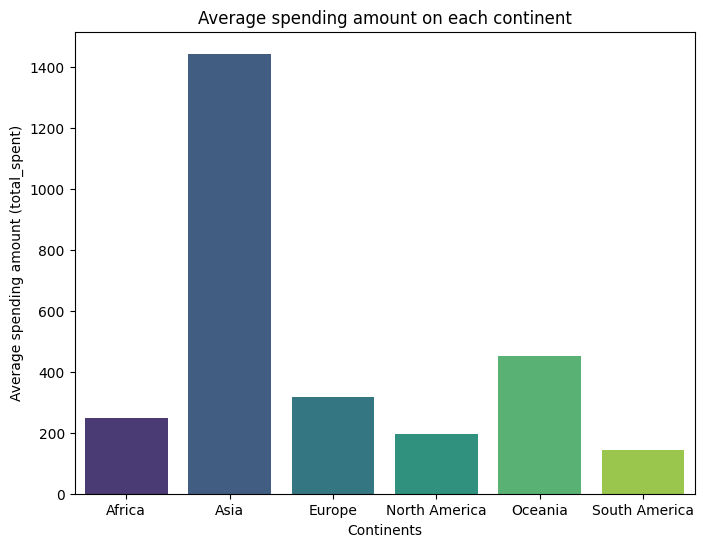

<ipython-input-21-cc86109b3a2f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


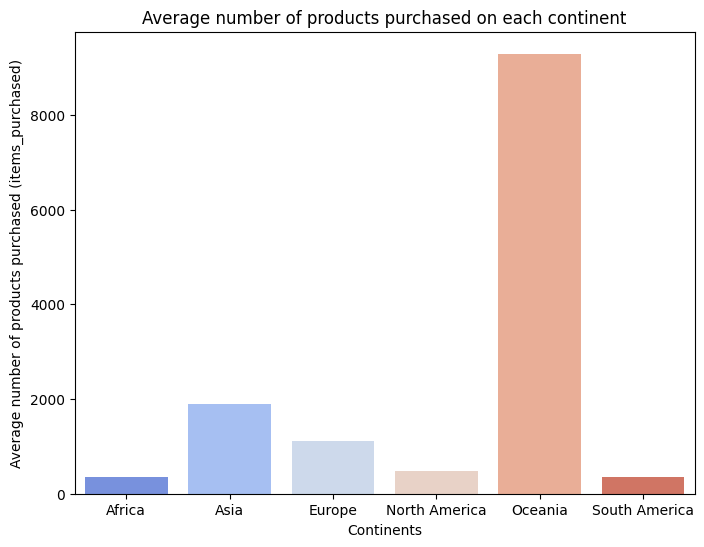

<ipython-input-21-cc86109b3a2f>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


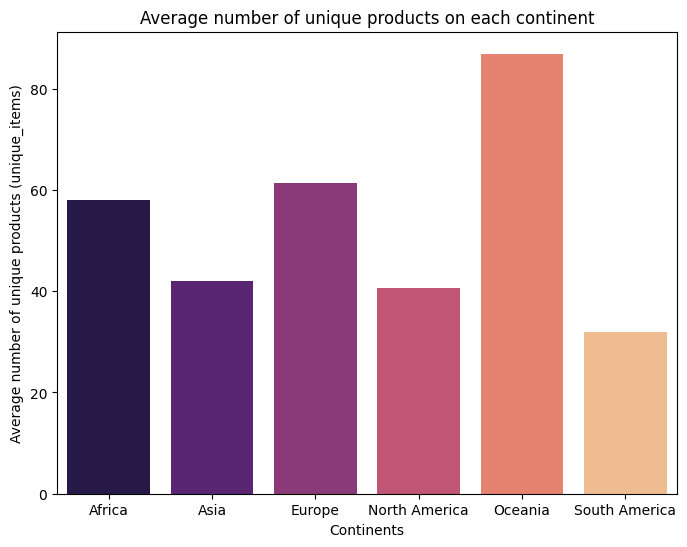

total_spent                       items_purchased         \
                      mean   median          std            mean median   
Continent                                                                 
Africa          248.100000  248.100          NaN      352.000000  352.0   
Asia           1442.717895   54.650  5734.054432     1902.368421  486.0   
Europe          317.088253  130.385  1233.805819     1103.600185  365.0   
North America   194.445000   50.850   313.285550      474.625000  112.5   
Oceania         450.527778  145.900   797.575019     9294.777778  740.0   
South America   142.600000  142.600          NaN      356.000000  356.0   

                            unique_items                     
                        std         mean median         std  
Continent                                                    
Africa                  NaN    58.000000   58.0         NaN  
Asia            3045.668458    42.000000   16.0   55.279090  
Europe          4544.636619    61.265235   35.0   85.480661  
North America    734.443606    40.625000   16.5   49.283256  
Oceania        25490.626762    86.888889   47.0  137.943326  
South America           NaN    32.000000   32.0         NaN

In [ ]:
# prompt: หาพฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีปว่าแตกต่างกันยังไง

# Group by Continent and then CustomerID to analyze purchasing behavior
customer_behavior_by_continent = data_n.groupby(['Continent', 'CustomerID']).agg(
    total_spent=('UnitPrice', 'sum'),
    items_purchased=('Quantity', 'sum'),
    unique_items=('StockCode', 'nunique')
)

# วิเคราะห์พฤติกรรมในแต่ละทวีป (เปรียบเทียบ Mean, Median, Std)
continent_stats = customer_behavior_by_continent.groupby('Continent').agg(
    {'total_spent': ['mean', 'median', 'std'],
     'items_purchased': ['mean', 'median', 'std'],
     'unique_items': ['mean', 'median', 'std']}
)
# Count number of Customer's from each Continents

# สรุปข้อมูลเบื้องต้น
summary = {
    "ทวีปที่มียอดใช้จ่ายเฉลี่ยสูงสุด": continent_stats['total_spent']['mean'].idxmax(),
    "ทวีปที่ซื้อสินค้ามากที่สุด": continent_stats['items_purchased']['mean'].idxmax(),
    "ทวีปที่มีสินค้าหลากหลายที่สุด": continent_stats['unique_items']['mean'].idxmax()
}

# พิมพ์สรุป
print("สรุปข้อมูลพฤติกรรมผู้บริโภคในแต่ละทวีป:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Visualization 1: ค่าเฉลี่ยยอดใช้จ่ายในแต่ละทวีป
plt.figure(figsize=(8, 6))
sns.barplot(
    data=continent_stats['total_spent'].reset_index(),
    x='Continent',
    y='mean',
    palette='viridis'
)
plt.title("Average spending amount on each continent")
plt.xlabel("Continents")
plt.ylabel("Average spending amount (total_spent)")
plt.show()

# Visualization 2: ค่าเฉลี่ยจำนวนสินค้าที่ซื้อในแต่ละทวีป
plt.figure(figsize=(8, 6))
sns.barplot(
    data=continent_stats['items_purchased'].reset_index(),
    x='Continent',
    y='mean',
    palette='coolwarm'
)
plt.title("Average number of products purchased on each continent")
plt.xlabel("Continents")
plt.ylabel("Average number of products purchased (items_purchased)")
plt.show()

# Visualization 3: ค่าเฉลี่ยจำนวนสินค้าที่ไม่ซ้ำกันในแต่ละทวีป
plt.figure(figsize=(8, 6))
sns.barplot(
    data=continent_stats['unique_items'].reset_index(),
    x='Continent',
    y='mean',
    palette='magma'
)
plt.title("Average number of unique products on each continent")
plt.xlabel("Continents")
plt.ylabel("Average number of unique products (unique_items)")
plt.show()
# Analyze the differences in purchasing behavior across continents
continent_stats = customer_behavior_by_continent.groupby('Continent').agg(['mean', 'median', 'std'])

continent_stats

จากข้อมูลที่ได้ จะมีค่า std ของ Africa และ South America ที่เป็นค่า NaN เพราะว่าจำนวนลูกค้ามีแค่คนเดียว เลยทำให้ไม่มีค่าความคลาดเคลื่อน

In [ ]:
# Count the number of unique customers for each continent
customer_count_by_continent = data.groupby('Continent')['CustomerID'].nunique().reset_index()

# Rename columns for better readability
customer_count_by_continent.columns = ['Continent', 'Unique_Customers']

# Display the result
customer_count_by_continent

,Continent,Unique_Customers
0,Africa,1
1,Asia,19
2,Europe,4332
3,North America,8
4,Oceania,9
5,South America,1
6,Unknown,4


โค้ดนี้ดูว่าในแต่ละไตรมาส ทวีปไหนซื้อสินค้าชนิดใดเยอะที่สุด

In [ ]:
# Add Quarter information to the dataset
data_n['InvoiceDate'] = pd.to_datetime(data_n['InvoiceDate'])
data_n['Quarter'] = data_n['InvoiceDate'].dt.to_period('Q')

# Find the most purchased item in each continent by Quarter
top_items_by_quarter = (
    data_n.groupby(['Continent', 'Quarter', 'StockCode'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(['Continent', 'Quarter', 'Quantity'], ascending=[True, True, False])
    .groupby(['Continent', 'Quarter'])
    .first()
    .reset_index()
)

# Add Description to Top Items by Quarter
top_items_by_quarter = top_items_by_quarter.merge(
    data_n[['StockCode', 'Description']].drop_duplicates(),
    on='StockCode',
    how='left'
)
top_items_by_quarter = top_items_by_quarter[['Continent', 'Quarter','StockCode', 'Description', 'Quantity']]
top_items_by_quarter.columns = ['Continent', 'Quarter','StockCode', 'Top_Item_Description', 'Quantity']

# Add a 'TotalPrice' column to the DataFrame
data_n['TotalPrice'] = data_n['UnitPrice'] * data_n['Quantity']

# Calculate the total sales value of the most purchased item in each quarter
top_items_value_by_quarter = (
    data_n.groupby(['Continent', 'Quarter', 'StockCode'])['TotalPrice']
    .sum()
    .reset_index()
    .sort_values(['Continent', 'Quarter', 'TotalPrice'], ascending=[True, True, False])
    .groupby(['Continent', 'Quarter'])
    .first()
    .reset_index()
)

# Add Description to Total Sales by Quarter
top_items_value_by_quarter = top_items_value_by_quarter.merge(
    data_n[['StockCode', 'Description']].drop_duplicates(),
    on='StockCode',
    how='left'
)
top_items_value_by_quarter = top_items_value_by_quarter[['Continent', 'Quarter', 'Description', 'TotalPrice']]
top_items_value_by_quarter.columns = ['Continent', 'Quarter', 'Top_Item_Description', 'Total_Sales']

# Merge all results into a single summary DataFrame
summary_by_quarter = top_items_by_quarter.merge(
    top_items_value_by_quarter[['Continent', 'Quarter', 'Total_Sales']],
    on=['Continent', 'Quarter']
)

# Display Results
print("Summary of Customer Behavior by Continent and Quarter:")
summary_by_quarter

<ipython-input-23-f17048e1ab8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['InvoiceDate'] = pd.to_datetime(data_n['InvoiceDate'])
<ipython-input-23-f17048e1ab8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['Quarter'] = data_n['InvoiceDate'].dt.to_period('Q')
<ipython-input-23-f17048e1ab8c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Summary of Customer Behavior by Continent and Quarter:


,Continent,Quarter,StockCode,Top_Item_Description,Quantity,Total_Sales
0,Africa,2011Q4,21889,WOODEN BOX OF DOMINOES,12,38.25
1,Asia,2010Q4,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,3794.40
2,Asia,2011Q1,22549,PICTURE DOMINOES,144,444.75
3,Asia,2011Q2,22489,PACK OF 12 TRADITIONAL CRAYONS,1008,522.00
4,Asia,2011Q3,22339,CHRISTMAS TREE PAINTED ZINC,288,704.10
5,Asia,2011Q4,23084,RABBIT NIGHT LIGHT,3113,5572.27
6,Europe,2010Q4,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5139,16784.10
7,Europe,2011Q1,85099B,JUMBO BAG RED RETROSPOT,10399,30600.20
8,Europe,2011Q2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,15072,43033.85
9,Europe,2011Q2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,15072,43033.85


# 2.ในแต่ละทวีป ไตรมาสใดมียอดขายมากที่สุด และ สินค้าใดที่มักซื้อคู่กันในไตรมาสนั้น

ในแต่ละทวีป ไตรมาสใดมียอดขายมากที่สุด

In [ ]:
# Find the quarter with the highest total sales for each continent
top_quarter_by_continent = (
    summary_by_quarter.groupby('Continent')
    .apply(lambda x: x.loc[x['Total_Sales'].idxmax()])
    .reset_index(drop=True)
)

# Display Results
print("Top Quarter and Best-Selling Item for Each Continent:")
top_quarter_by_continent

Top Quarter and Best-Selling Item for Each Continent:


<ipython-input-24-f94cdba97ff8>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['Total_Sales'].idxmax()])


,Continent,Quarter,StockCode,Top_Item_Description,Quantity,Total_Sales
0,Africa,2011Q4,21889,WOODEN BOX OF DOMINOES,12,38.25
1,Asia,2011Q4,23084,RABBIT NIGHT LIGHT,3113,5572.27
2,Europe,2011Q2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,15072,43033.85
3,North America,2011Q3,47593B,SCOTTIE DOGS BABY BIB,48,550.94
4,Oceania,2011Q4,23084,RABBIT NIGHT LIGHT,1632,2921.28
5,South America,2011Q2,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,24,175.20


In [ ]:
from apyori import apriori

data_n['CustomerID'] = data_n['CustomerID'].astype('Int64')

<ipython-input-67-009dc2f8163a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['CustomerID'] = data_n['CustomerID'].astype('Int64')


In [ ]:
North_America_data = data_n[data_n['Continent']=='North America']
Europe_data = data_n[data_n['Continent']=='Europe']
Asia_data = data_n[data_n['Continent']=='Asia']
Oceania_data = data_n[data_n['Continent']=='Oceania']
Africa_data = data_n[data_n['Continent']=='Africa']
South_America_data = data_n[data_n['Continent']=='South America	']

## Europe

In [ ]:
top_quarter_europe = Europe_data[Europe_data['Quarter'] == '2011Q2']
top_quarter_europe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Quarter,TotalPrice
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161,United Kingdom,Europe,2011Q2,16.50
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161,United Kingdom,Europe,2011Q2,19.80
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161,United Kingdom,Europe,2011Q2,10.20
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161,United Kingdom,Europe,2011Q2,19.90
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161,United Kingdom,Europe,2011Q2,15.30
...,...,...,...,...,...,...,...,...,...,...,...
245898,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,Europe,2011Q2,5.04
245899,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,Europe,2011Q2,5.04
245900,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,Europe,2011Q2,5.04
245901,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom,Europe,2011Q2,5.04


In [ ]:
transactions_europe = top_quarter_europe.groupby('CustomerID')['StockCode'].apply(list)
transactions_europe

,StockCode
CustomerID,
12347,"[22376, 22374, 22371, 22375, 20665, 23076, 217..."
12348,"[23077, 23078, 23076, 22437, POST]"
12354,"[23201, 23204, 23205, 23254, 23255, 23256, 219..."
12356,"[84991, 21212, 22938, 21124, 84457, 22857, 211..."
12359,"[22839, 22666, 85099C, 22993, 23050, 23049, 23..."
...,...
18270,"[POST, 84968C]"
18272,"[20754, 21563, 71459, 22557, 22979, 22980, 207..."
18281,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"


In [94]:
min_sup = 0.06

frequentItemsets = list(apriori(transactions_europe,min_support = min_sup))

# กรองเฉพาะ frequent itemsets ที่ซื้อสินค้าเป็นคู่
pair_itemsets = [itemset for itemset in frequentItemsets if len(itemset[0]) == 2]

# แสดงผลลัพธ์
for itemset in pair_itemsets:
    print(f"{itemset}\n")

# แสดงผลลัพธ์พร้อมคำอธิบาย
for itemset in pair_itemsets:
    descriptions = []
    for stockcode in itemset[0]:  # itemset[0] คือ frozenset ของ StockCode
        description = data_n[data_n['StockCode'] == stockcode]['Description'].values
        if description.size > 0:  # ตรวจสอบว่ามีคำอธิบายหรือไม่
            descriptions.append(description[0])  # เก็บคำอธิบายสินค้า

    # รวมคำอธิบายทั้งหมดของชุดสินค้าภายใน itemset
    combined_description = ', '.join(descriptions)  # รวมคำอธิบายเป็นข้อความเดียว
    print(f"ชุดสินค้าที่ซื้อพร้อมกัน (เป็นคู่): {combined_description}")

RelationRecord(items=frozenset({'20725', '20727'}), support=0.06034912718204489, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725', '20727'}), confidence=0.06034912718204489, lift=1.0), OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'20727'}), confidence=0.5062761506276151, lift=5.800478182904961), OrderedStatistic(items_base=frozenset({'20727'}), items_add=frozenset({'20725'}), confidence=0.6914285714285714, lift=5.800478182904961)])

RelationRecord(items=frozenset({'20725', '22384'}), support=0.06084788029925187, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725', '22384'}), confidence=0.06084788029925187, lift=1.0), OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'22384'}), confidence=0.5104602510460251, lift=5.30296789299109), OrderedStatistic(items_base=frozenset({'22384'}), items_add=frozenset({'20725'}), confidence=0.6321243523316062, lift=5.3029678929910

### สรุปผล

> 1. LUNCH BAG RED RETROSPOT และ LUNCH BAG  BLACK SKULL

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.06

ความน่าจะเป็นที่จะซื้อ LUNCH BAG RED RETROSPOT ก่อนแล้วค่อยซื้อ LUNCH BAG  BLACK SKULL คือ 0.51

ความน่าจะเป็นที่จะซื้อ LUNCH BAG  BLACK SKULL ก่อนแล้วค่อยซื้อ LUNCH BAG RED RETROSPOT คือ 0.69

> 2. LUNCH BAG RED RETROSPOT และ LUNCH BAG PINK POLKADOT

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.061

ความน่าจะเป็นที่จะซื้อ LUNCH BAG RED RETROSPOT ก่อนแล้วค่อยซื้อ LUNCH BAG PINK POLKADOT คือ 0.51

ความน่าจะเป็นที่จะซื้อ LUNCH BAG PINK POLKADOT ก่อนแล้วค่อยซื้อ LUNCH BAG RED RETROSPOT คือ 0.63

> 3. ROSES REGENCY TEACUP AND SAUCER และ REGENCY CAKESTAND 3 TIER

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.062

ความน่าจะเป็นที่จะซื้อ ROSES REGENCY TEACUP AND SAUCER ก่อนแล้วค่อยซื้อ REGENCY CAKESTAND 3 TIER คือ 0.36

ความน่าจะเป็นที่จะซื้อ REGENCY CAKESTAND 3 TIER ก่อนแล้วค่อยซื้อ ROSES REGENCY TEACUP AND SAUCER คือ 0.69

> 4. PINK REGENCY TEACUP AND SAUCER และ GREEN REGENCY TEACUP AND SAUCER

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.060

ความน่าจะเป็นที่จะซื้อ PINK REGENCY TEACUP AND SAUCER ก่อนแล้วค่อยซื้อ GREEN REGENCY TEACUP AND SAUCER คือ 0.77

ความน่าจะเป็นที่จะซื้อ GREEN REGENCY TEACUP AND SAUCER ก่อนแล้วค่อยซื้อ PINK REGENCY TEACUP AND SAUCER คือ 0.89

> 5. ROSES REGENCY TEACUP AND SAUCER และ GREEN REGENCY TEACUP AND SAUCER

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.066

ความน่าจะเป็นที่จะซื้อ ROSES REGENCY TEACUP AND SAUCER ก่อนแล้วค่อยซื้อ GREEN REGENCY TEACUP AND SAUCER คือ 0.84

ความน่าจะเป็นที่จะซื้อ GREEN REGENCY TEACUP AND SAUCER ก่อนแล้วค่อยซื้อ ROSES REGENCY TEACUP AND SAUCER คือ 0.73

>6. JUMBO BAG DOILEY PATTERNS และ LUNCH BAG DOILEY PATTERN

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.061

ความน่าจะเป็นที่จะซื้อ JUMBO BAG DOILEY PATTERNS ก่อนแล้วค่อยซื้อ LUNCH BAG DOILEY PATTERN คือ 0.56

ความน่าจะเป็นที่จะซื้อ LUNCH BAG DOILEY PATTERN ก่อนแล้วค่อยซื้อ JUMBO BAG DOILEY PATTERNS คือ 0.57

> 7.LUNCH BAG APPLE DESIGN และ LUNCH BAG ALPHABET DESIGN

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.062

ความน่าจะเป็นที่จะซื้อ LUNCH BAG APPLE DESIGN ก่อนแล้วค่อยซื้อ LUNCH BAG ALPHABET DESIGN คือ 0.53

ความน่าจะเป็นที่จะซื้อ LUNCH BAG ALPHABET DESIGN ก่อนแล้วค่อยซื้อ LUNCH BAG APPLE DESIGN คือ 0.62

>8. SPOTTY BUNTING และ PARTY BUNTING

ความน่าจะเป็นที่จะซื้อสองอย่างพร้อมกัน คือ 0.069

ความน่าจะเป็นที่จะซื้อ SPOTTY BUNTING ก่อนแล้วค่อยซื้อ PARTY BUNTING คือ 0.49

ความน่าจะเป็นที่จะซื้อ PARTY BUNTING ก่อนแล้วค่อยซื้อ SPOTTY BUNTING คือ 0.36